In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [29]:
data = pd.read_csv('Social_Network_Ads.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [56]:
X = data.iloc[:,1:4].values
Y = data.iloc[:, 4].values
print([X.shape, Y.shape])

[(400, 3), (400,)]


In [57]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
X[:,0] = LabelEncoder().fit_transform(X[:,0])
# X = OneHotEncoder().fit_transform(X).toarray()
X.shape

(400, 3)

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [59]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [60]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [61]:
Y_pred = clf.predict(X_test)
print(Y_pred)

[0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 1 0 1 1]


In [62]:
from sklearn.metrics import accuracy_score,confusion_matrix
print(accuracy_score(Y_test,Y_pred))
cm = confusion_matrix(Y_test,Y_pred)
cm

0.925


array([[56,  2],
       [ 4, 18]], dtype=int64)

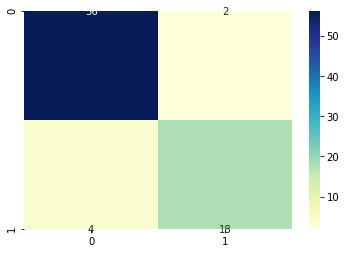

In [63]:
import seaborn as sns
sns.heatmap(cm,cmap="YlGnBu",annot=True)
plt.show()